## Quick Lookup

Dataset:
https://www.kaggle.com/c/competitive-data-science-final-project/data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data/sales_train_v2.csv")
test = pd.read_csv("../data/test.csv")
items = pd.read_csv("../data/items.csv")
item_cats = pd.read_csv("../data/item_categories.csv")
shops = pd.read_csv("../data/shops.csv")

In [3]:
%matplotlib inline

In [4]:
len(train)

2935849

In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
len(items)

22170

In [8]:
item_cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

## Convert to datetime

In [12]:
train["datetime"] = pd.to_datetime(train.date, format="%d.%m.%Y")

In [13]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


## Split datetime

In [14]:
def get_year(x):
    return x.year

def get_month(x):
    return x.month

def get_day(x):
    return x.day

In [15]:
train["year"] = train.datetime.apply(get_year)
train["month"] = train.datetime.apply(get_month)
train["day"] = train.datetime.apply(get_day)

In [16]:
train = train.sort_values("datetime")

In [17]:
train.dtypes

date                      object
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
datetime          datetime64[ns]
year                       int64
month                      int64
day                        int64
dtype: object

## Number of shops

In [18]:
len(train.shop_id.unique())

60

In [19]:
len(test.shop_id.unique())

42

## Shops which are not in test set

In [20]:
# Shop IDs that are not in test set
train_shops = train.shop_id.unique().tolist()
test_shops = test.shop_id.unique().tolist()

In [21]:
shop_diff = [s for s in train_shops if s not in test_shops]

In [22]:
print(shop_diff)

[27, 8, 51, 54, 13, 29, 23, 32, 30, 43, 1, 0, 17, 9, 40, 33, 20, 11]


### Shops which are not in test set by name

In [23]:
shops.dtypes

shop_name    object
shop_id       int64
dtype: object

In [24]:
shops_ids = {name: sid for name, sid in zip(shops.shop_name.astype(str).tolist(), shops.shop_id.tolist())}

In [25]:
ids_shops = {sid: name for name, sid in zip(shops.shop_name.astype(str).tolist(), shops.shop_id.tolist())}

In [26]:
shop_diff = sorted(shop_diff)
for sid in shop_diff:
    print(str(sid) + " : " + ids_shops[sid])

0 : !Якутск Орджоникидзе, 56 фран
1 : !Якутск ТЦ "Центральный" фран
8 : Воронеж ТРЦ Сити-Парк "Град"
9 : Выездная Торговля
11 : Жуковский ул. Чкалова 39м²
13 : Казань ТЦ "Бехетле"
17 : Красноярск ТЦ "Взлетка Плаза"
20 : Москва "Распродажа"
23 : Москва ТК "Буденовский" (пав.А2)
27 : Москва ТЦ "МЕГА Белая Дача II"
29 : Москва ТЦ "Новый век" (Новокосино)
30 : Москва ТЦ "Перловский"
32 : Москва ТЦ "Серебряный Дом"
33 : Мытищи ТРК "XL-3"
40 : РостовНаДону ТРК "Мегацентр Горизонт" Островной
43 : СПб ТК "Сенная"
51 : Тюмень ТЦ "Зеленый Берег"
54 : Химки ТЦ "Мега"


## Frequencies of shops in test set

In [27]:
len(test)

214200

In [28]:
len(test)/len(test.shop_id.unique())

5100.0

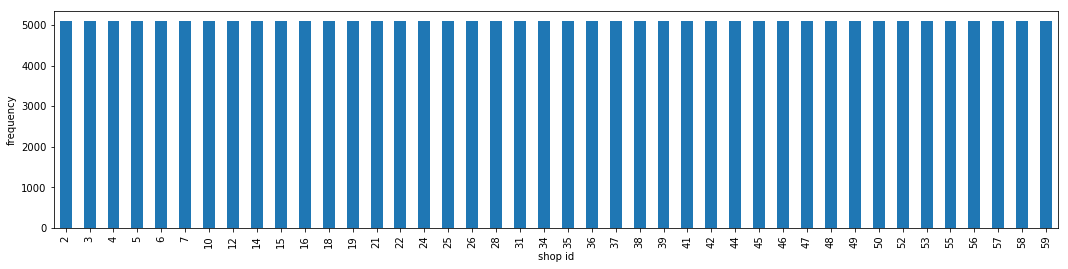

In [29]:
test.groupby("shop_id").item_id.count().plot(kind="bar", figsize=(18,4)).set(ylabel="frequency", xlabel="shop id")

In [30]:
test.groupby("shop_id").shop_id.count().head()

shop_id
2    5100
3    5100
4    5100
5    5100
6    5100
Name: shop_id, dtype: int64

## Frequencies of shops in train set

In [31]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,year,month,day
49800,01.01.2013,0,18,5823,2500.0,1.0,2013-01-01,2013,1,1
29784,01.01.2013,0,27,5573,849.0,1.0,2013-01-01,2013,1,1
35476,01.01.2013,0,7,1006,399.0,1.0,2013-01-01,2013,1,1
8330,01.01.2013,0,19,17707,899.0,1.0,2013-01-01,2013,1,1
57384,01.01.2013,0,14,19548,149.0,1.0,2013-01-01,2013,1,1


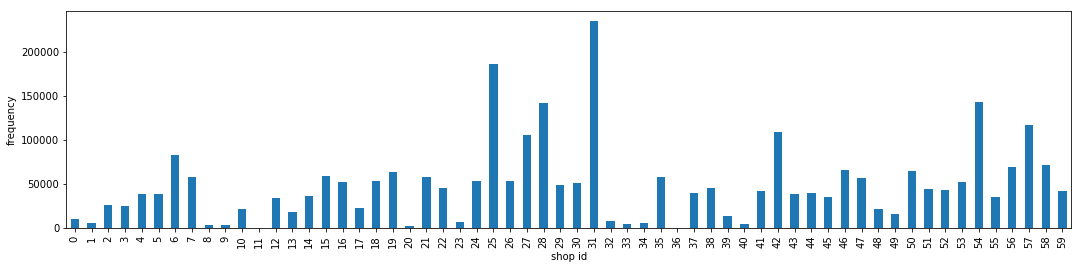

In [32]:
train.groupby("shop_id").shop_id.count().plot(kind="bar", figsize=(18,4)).set(ylabel="frequency", xlabel="shop id")

## Number of sales (and returns) by shop in train set

In [33]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,year,month,day
49800,01.01.2013,0,18,5823,2500.0,1.0,2013-01-01,2013,1,1
29784,01.01.2013,0,27,5573,849.0,1.0,2013-01-01,2013,1,1
35476,01.01.2013,0,7,1006,399.0,1.0,2013-01-01,2013,1,1
8330,01.01.2013,0,19,17707,899.0,1.0,2013-01-01,2013,1,1
57384,01.01.2013,0,14,19548,149.0,1.0,2013-01-01,2013,1,1


### By shop ids

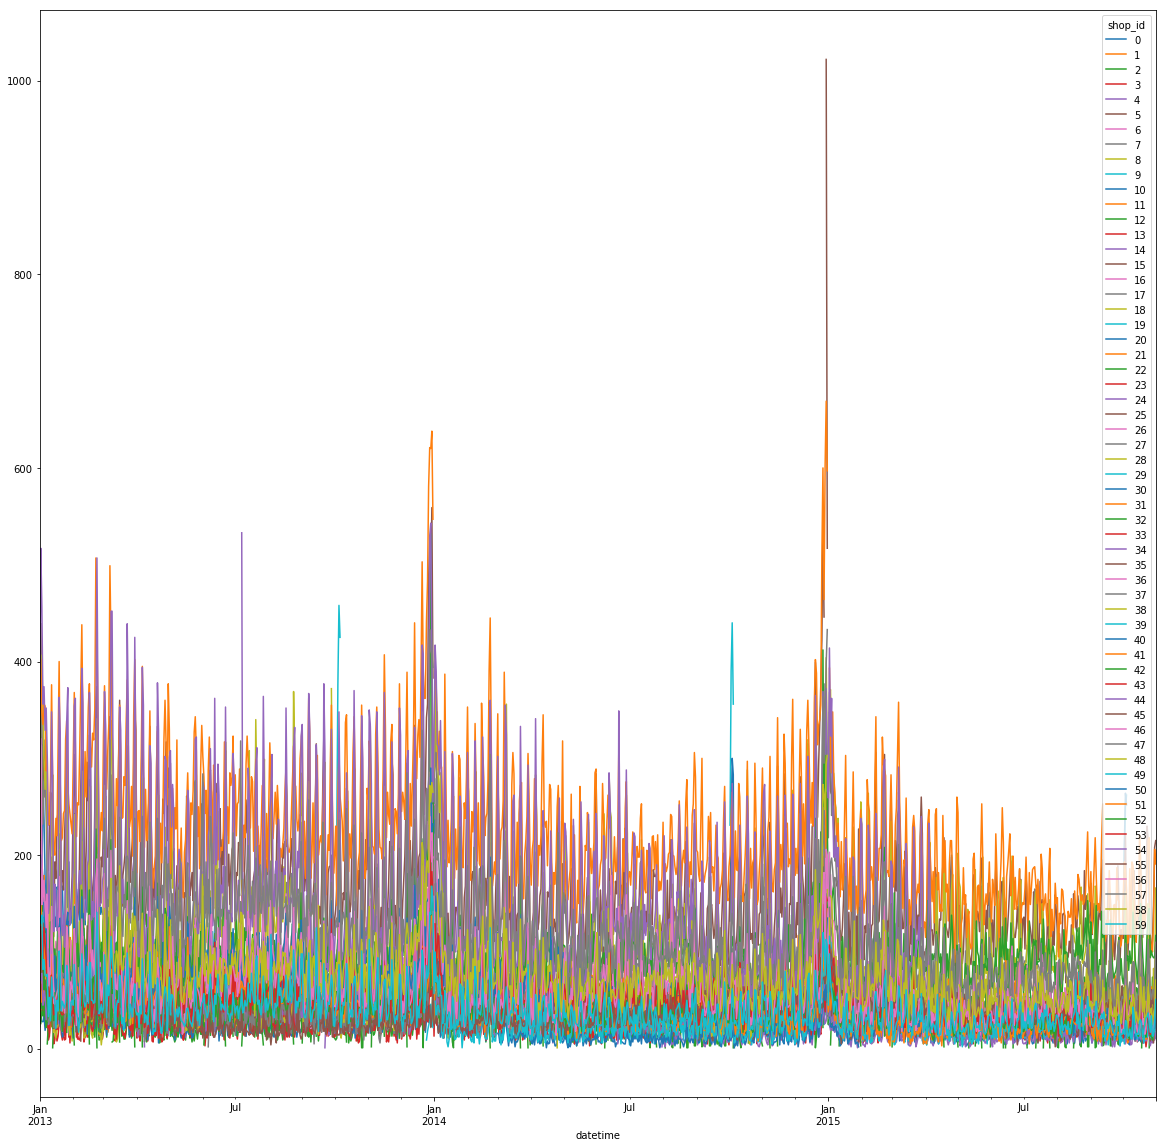

In [34]:
train.groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,20))

### For all shops together

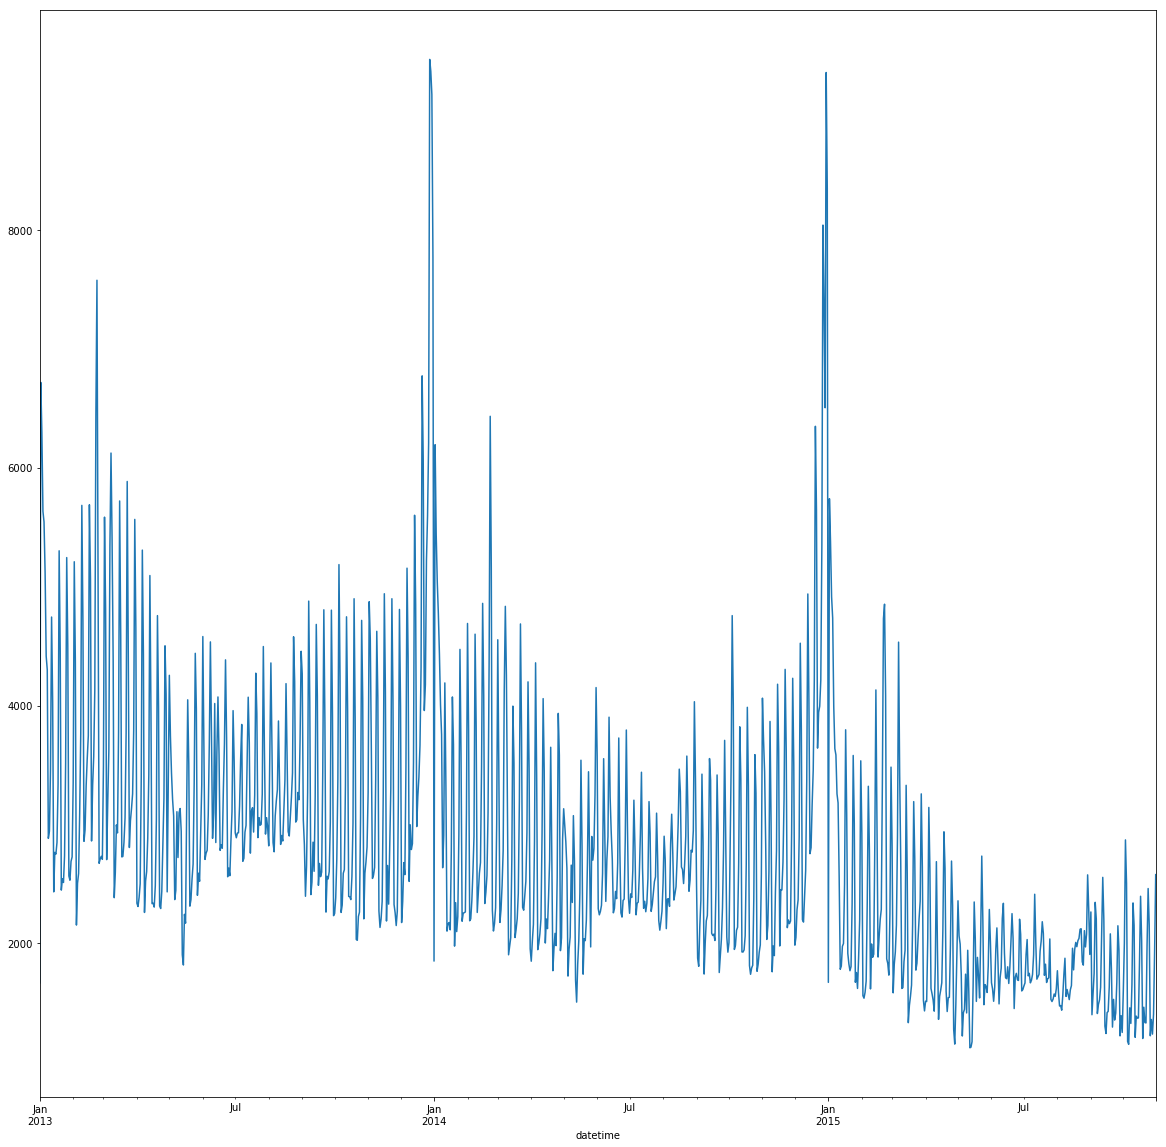

In [35]:
train.groupby(["datetime"]).item_id.count().plot(figsize=(20,20))

### For some specific shops and a time interval

#### During 2013

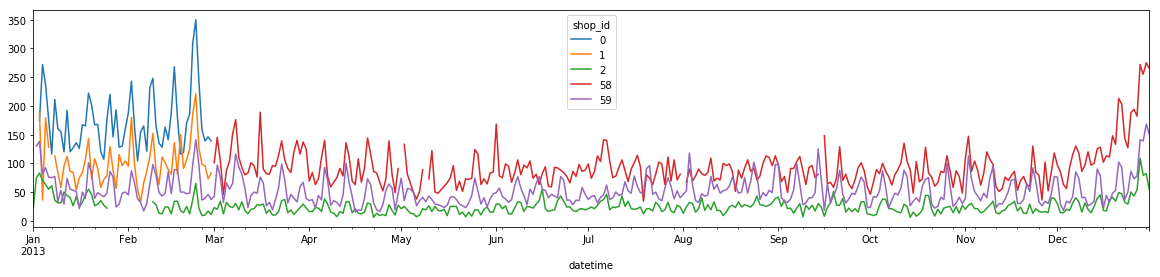

In [36]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2013)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))

#### Compare by consequent months

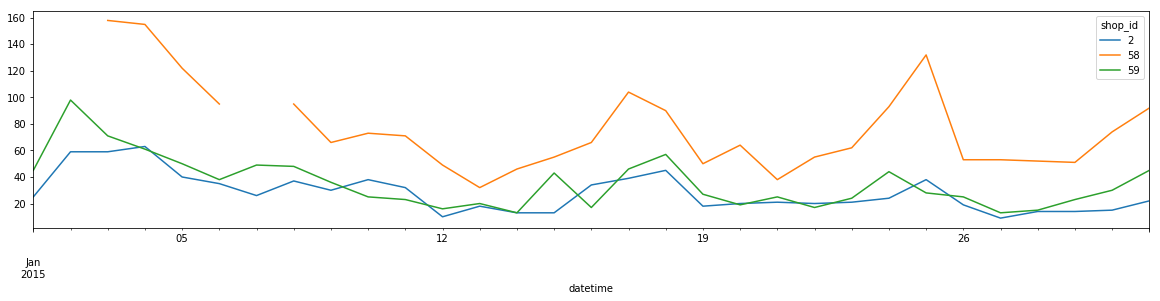

In [37]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2015) &
    (train.month == 1)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))

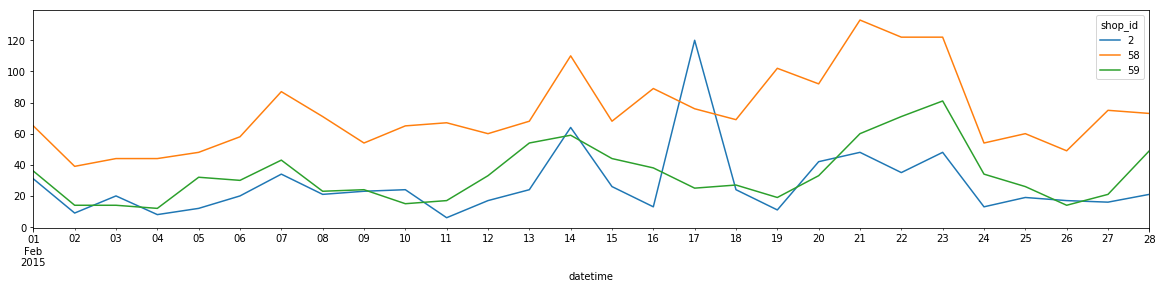

In [38]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2015) &
    (train.month == 2)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))

#### Dealing with NANs

In [39]:
# NANs
nan_check = train[
    (train.shop_id.isin([2, 58])) & (train.month == 1) & (train.year == 2015)].groupby(
    ["datetime", "shop_id"]).item_id.count().unstack()

In [40]:
nan_check.head()

shop_id,2,58
datetime,,
2015-01-01,25.0,NaN
2015-01-02,59.0,NaN
2015-01-03,59.0,158.0
2015-01-04,63.0,155.0
2015-01-05,40.0,122.0


In [41]:
# how to fill NANs
nan_check = train[
    (train.shop_id.isin([2, 58])) & (train.month == 1) & (train.year == 2015)].groupby(
    ["datetime", "shop_id"]).item_id.count().unstack().fillna(-999)

In [42]:
nan_check.head()

shop_id,2,58
datetime,,
2015-01-01,25.0,-999.0
2015-01-02,59.0,-999.0
2015-01-03,59.0,158.0
2015-01-04,63.0,155.0
2015-01-05,40.0,122.0


#### Compare consequent years

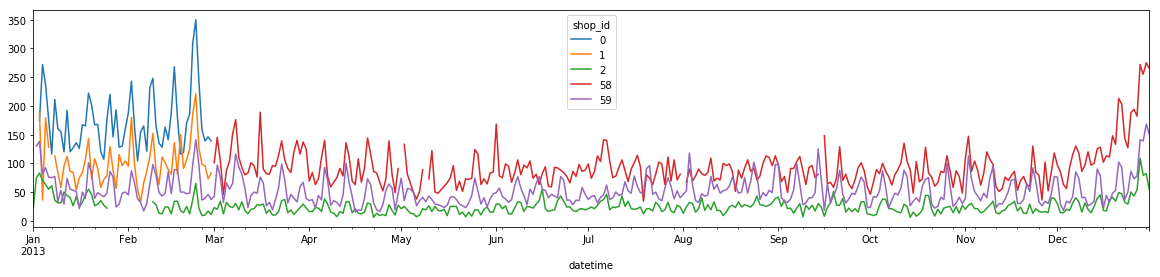

In [43]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2013)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))

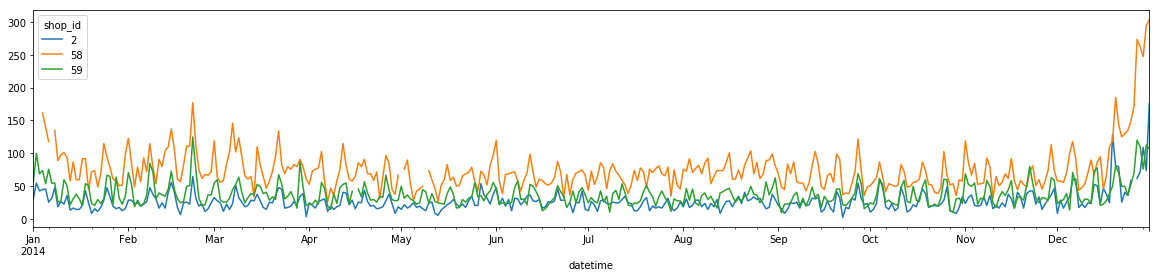

In [44]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2014)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))

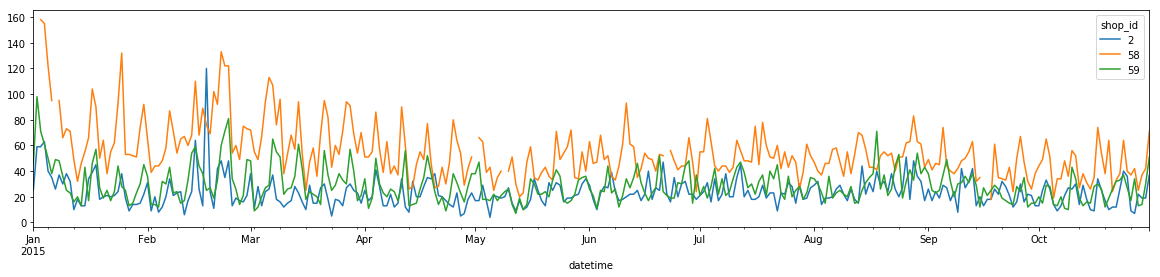

In [45]:
train[
    (train.shop_id.isin([0,1,2,58,59])) &
    (train.year == 2015)
].groupby(["datetime", "shop_id"]).item_id.count().unstack().plot(figsize=(20,4))